In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, halfcauchy
import zeus

In [6]:
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])


def eight_schools_logdensity(params, y, sigma):
    mu = params[0]
    tau = params[1]
    theta = params[2:]

    logp = norm.logpdf(mu, loc=0, scale=5)
    logp += halfcauchy.logpdf(tau, loc=0, scale=5)

    for yi, si, thetai in zip(y, sigma, theta):
        logp += norm.logpdf(thetai, loc=0, scale=1)
        logp += norm.logpdf(yi, loc=mu + tau * thetai, scale=si)
    return logp

In [7]:
ndim = 10
nwalkers = 50
logposterior = lambda x: eight_schools_logdensity(x, y, sigma)
sampler = zeus.EnsembleSampler(nwalkers, ndim, logposterior)

In [8]:
def prior_transform(cube):
    p = np.zeros(10)
    p[0] = norm.ppf(cube[0], loc=0, scale=5)
    p[1] = halfcauchy.ppf(cube[1], loc=0, scale=5)
    p[2:] = norm.ppf(cube[2:], loc=0, scale=1)   
    return p

In [9]:
p = np.random.rand(nwalkers, ndim)
start = [ prior_transform(p[i]) for i in range(nwalkers) ]

sampler.run_mcmc(p, 1000)

Initialising ensemble of 50 walkers...
Sampling progress : 100%|██████████| 1000/1000 [04:22<00:00,  3.81it/s]


In [15]:
sampler.summary

Summary
-------
Number of Generations: 1000
Number of Parameters: 10
Number of Walkers: 50
Number of Tuning Generations: 14
Scale Factor: 0.4659
Mean Integrated Autocorrelation Time: 22.72
Effective Sample Size: 2200.72
Number of Log Probability Evaluations: 245276
Effective Samples per Log Probability Evaluation: 0.008972


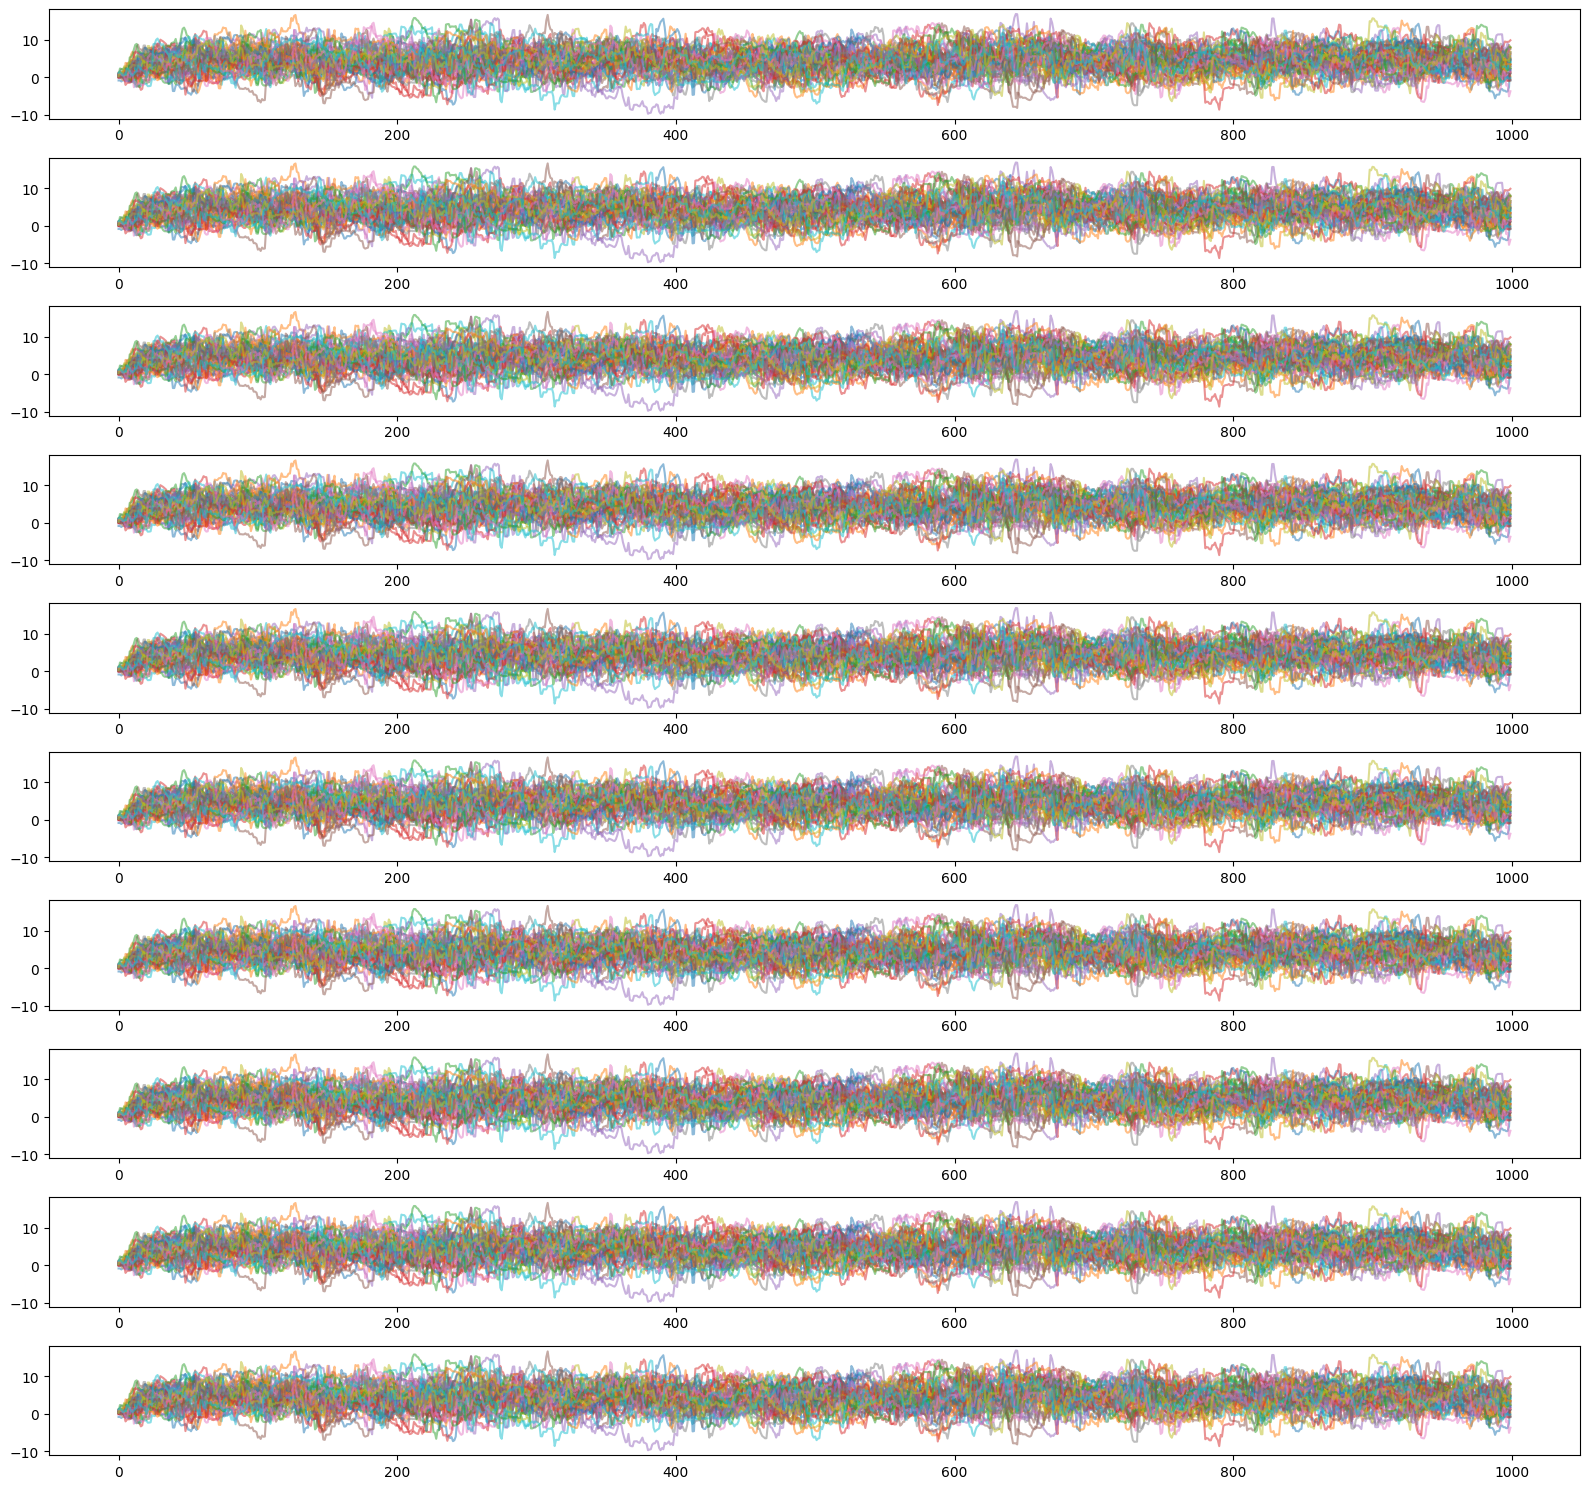

In [17]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(sampler.get_chain()[:,:,0], alpha=0.5)
plt.tight_layout()
plt.show()